# Sales Data Analysis

### PROBLEMS
#### What was the best month for sales? How much was earned that month?
#### What city sold the most product?
#### What time should we display advertisements to maximize likelihood of customer’s buying products?
#### What Products are most often sold together?
#### What product sold the most? Why do you think it did?

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [22]:
path='SalesAnalysis/Sales_Data'
files=[files for files in os.listdir(path)]

In [23]:
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [24]:
all_months_data=pd.DataFrame()

In [25]:
for file in files:
    current_data=pd.read_csv(path + '/' + file)
    all_months_data=pd.concat([all_months_data,current_data])

In [26]:
all_months_data.to_csv('all_data.csv',index=False)

In [4]:
data=pd.read_csv('all_data.csv')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [9]:
data.shape

(186850, 6)

In [10]:
data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [28]:
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [7]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [15]:
data['Month']=data['Order Date'].str[0:2]
data['Month']=data['Month'].astype('int32')

ValueError: invalid literal for int() with base 10: 'Or'

In [8]:
data=data[data['Order Date'].str[0:2] != 'Or']

data['Month']=data['Order Date'].str[0:2]
data['Month']=data['Month'].astype('string')

In [ ]:
data.sort_values(by='Month',ascending=True)

In [10]:
look_up = {'01':'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr', '05': 'May',
           '06': 'Jun', '07': 'Jul', '08': 'Aug', '09': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'}
data['Month']=data['Month'].apply(lambda x : look_up[x])

In [11]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr


### We can get the sales by multiplying the quantity ordered and price each

In [12]:
data['Quantity Ordered']=data['Quantity Ordered'].astype('float')
data['Price Each']=data['Price Each'].astype('float')

In [13]:
data['Sales']=data['Quantity Ordered'] * data['Price Each']

In [14]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99


#### By using the sales data we can easily find how much earn by perticular month

In [15]:
highest_sales=data.groupby('Month').sum()

In [16]:
highest_sales['Sales']=highest_sales['Sales'].astype('int32')

In [17]:
highest_sales.sort_index(axis = 0) 

,Quantity Ordered,Price Each,Sales
Month,,,
Apr,20558.0,3.367671e+06,3390670
Aug,13448.0,2.230345e+06,2244467
Dec,28114.0,4.588415e+06,4613443
Feb,13449.0,2.188885e+06,2202022
Jan,10903.0,1.811768e+06,1822256
Jul,16072.0,2.632540e+06,2647775
Jun,15253.0,2.562026e+06,2577802
Mar,17005.0,2.791208e+06,2807100
May,18667.0,3.135125e+06,3152606


<BarContainer object of 12 artists>

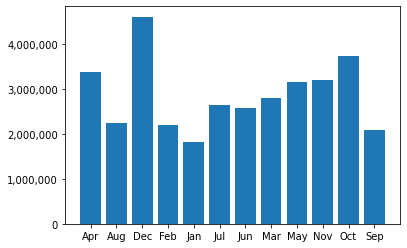

In [18]:
plt.figure()
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.bar(highest_sales.index,highest_sales['Sales'])

In [19]:
data['City']=data['Purchase Address'].apply(lambda x: x.split(',')[1])

In [20]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles


In [21]:
c_purchased_high=data.groupby('City').sum()

In [22]:
c_purchased_high.head()

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta,16602.0,2.779908e+06,2.795499e+06
Austin,11153.0,1.809874e+06,1.819582e+06
Boston,22528.0,3.637410e+06,3.661642e+06
Dallas,16730.0,2.752628e+06,2.767975e+06
Los Angeles,33289.0,5.421435e+06,5.452571e+06


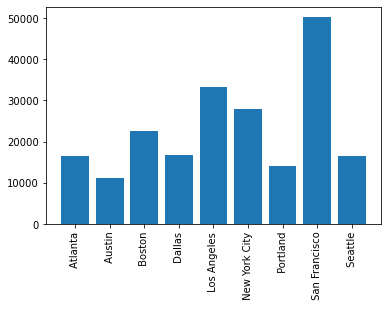

In [23]:
plt.figure()
plt.bar(c_purchased_high.index,c_purchased_high['Quantity Ordered'])
plt.xticks(rotation=90)
plt.show()

### At what time we have to advertize the products

In [24]:
data['Time']=data['Order Date'].str[8:11]

In [25]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas,08
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston,22
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,14
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,14
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,09


In [26]:
Maxtime=data.groupby('Time').sum()

In [27]:
Maxtime.sort_values(by='Quantity Ordered',ascending=False)

,Quantity Ordered,Price Each,Sales
Time,,,
19,14470.0,2398588.31,2412938.54
12,14202.0,2299876.68,2316821.34
11,14005.0,2288855.18,2300610.24
18,13802.0,2207696.93,2219348.30
20,13768.0,2268185.16,2281716.24
13,13685.0,2139743.86,2155389.80
14,12362.0,2072194.77,2083672.73
10,12308.0,1932665.62,1944286.77
21,12244.0,2030763.83,2042000.86


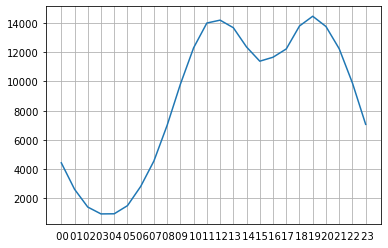

In [28]:
plt.figure()
plt.plot(Maxtime.index.unique(),Maxtime['Quantity Ordered'])
plt.grid()
plt.tick_params(bottom=False)

In [29]:
duplicate_data=data[data['Order ID'].duplicated(keep=False)]

In [30]:
duplicate_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,14
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,14
18,176574,Google Phone,1.0,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,19
19,176574,USB-C Charging Cable,1.0,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",Apr,11.95,Los Angeles,19
30,176585,Bose SoundSport Headphones,1.0,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",Apr,99.99,Boston,11


In [31]:
duplicate_data['Product_Bundle']=duplicate_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

<ipython-input-31-736babb17f69>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate_data['Product_Bundle']=duplicate_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [32]:
duplicate_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time,Product_Bundle
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1.0,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1.0,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",Apr,11.95,Los Angeles,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1.0,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",Apr,99.99,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [33]:
duplicate_data=duplicate_data[['Order ID','Product_Bundle']].drop_duplicates()

In [34]:
duplicate_data.head()

,Order ID,Product_Bundle
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [35]:
from itertools import combinations
from collections import Counter

In [36]:
count=Counter()

In [37]:
for row in duplicate_data['Product_Bundle']:
    rows=row.split(',')
    count.update(Counter(combinations(rows,2)))

In [38]:
key_max=max(count,key=count.get)

In [39]:
key_max

('iPhone', 'Lightning Charging Cable')

In [40]:
count1 = Counter()

In [41]:
for row in duplicate_data['Product_Bundle']:
    rows=row.split(',')
    count1.update(Counter(combinations(rows,3)))

In [42]:
key_max1=max(count1,key=count1.get)

In [43]:
key_max1

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones')

In [44]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas,08
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston,22
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,14
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,14
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,09


In [45]:
data['Quantity Ordered'].max()

9.0

In [46]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas,08
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston,22
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,14
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,14
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,09


In [56]:
product_max=data.groupby('Product')['Quantity Ordered'].sum()

In [58]:
product_max.nlargest(3)

Product
AAA Batteries (4-pack)    31017.0
AA Batteries (4-pack)     27635.0
USB-C Charging Cable      23975.0
Name: Quantity Ordered, dtype: float64

In [49]:
product_max.loc[product_max['Quantity Ordered'].idxmax()]

Quantity Ordered    31017.00
Price Each          61716.59
Sales               92740.83
Name: AAA Batteries (4-pack), dtype: float64

In [48]:
product_max.head()

,Quantity Ordered,Price Each,Sales
Product,,,
20in Monitor,4129.0,451068.99,454148.71
27in 4K Gaming Monitor,6244.0,2429637.70,2435097.56
27in FHD Monitor,7550.0,1125974.93,1132424.50
34in Ultrawide Monitor,6199.0,2348718.19,2355558.01
AA Batteries (4-pack),27635.0,79015.68,106118.40


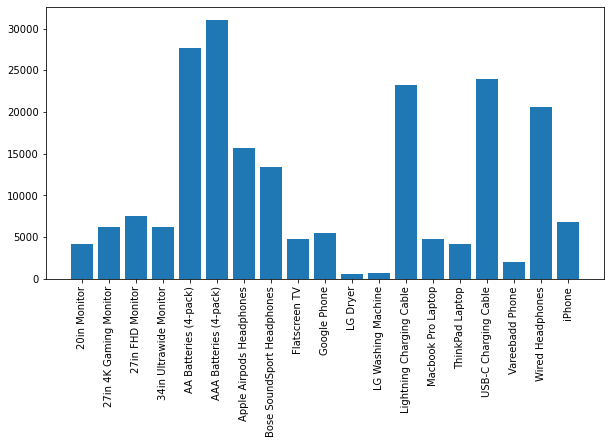

In [55]:
plt.figure(figsize=(10,5))
plt.bar(product_max.index,product_max['Quantity Ordered'])
plt.xticks(rotation=90)
plt.show()